In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('iaplan.csv', delimiter=";")
df.head()

,cookiesEnabled,deviceMemory,email,hardwareConcurrency,ip,languages,localStorage,nome,password,platform,sessionStorage,telefone,timezone,touchSupport,vendor,vendorFlavors
0,True,8,angelovictor2001@hotmail.com,4,27.66.111.218,pt-BR,True,Ângelo Victor de Lima,123,Win32,True,551232217235,America/Sao_Paulo,False,Google Inc.,Chrome
1,False,4,sandro.toline@gmail.com,4,68.229.232.51,pt-BR,False,Sandro Toline de Oliveira Junior,zD8LZkgD,Win32,True,12981647080,America/Sao_Paulo,False,Google Inc.,Chrome
2,False,2,tabatha_froes@bol.com,2,212.21.113.136,pt-BR,True,Tábatha Fróes,IZu8r56G,Win32,False,81998170787,America/Sao_Paulo,True,Google Inc.,Chrome
3,True,4,natalia.reis@outlook.com,4,209.21.139.38,pt-BR,True,Natália dos Reis Neves,Ex1gNerT,Win32,False,12989082719,America/Sao_Paulo,False,Google Inc.,Chrome
4,False,8,caique-fernandes@uol.com,4,187.197.79.188,pt-BR,False,Caique Fernandes,SQLqD3H2,Win32,True,12983426483,America/Sao_Paulo,True,Google Inc.,Chrome


In [5]:
df

,cookiesEnabled,deviceMemory,email,hardwareConcurrency,ip,languages,localStorage,nome,password,platform,sessionStorage,telefone,timezone,touchSupport,vendor,vendorFlavors
0,True,8,angelovictor2001@hotmail.com,4,27.66.111.218,pt-BR,True,Ângelo Victor de Lima,123,Win32,True,551232217235,America/Sao_Paulo,False,Google Inc.,Chrome
1,False,4,sandro.toline@gmail.com,4,68.229.232.51,pt-BR,False,Sandro Toline de Oliveira Junior,zD8LZkgD,Win32,True,12981647080,America/Sao_Paulo,False,Google Inc.,Chrome
2,False,2,tabatha_froes@bol.com,2,212.21.113.136,pt-BR,True,Tábatha Fróes,IZu8r56G,Win32,False,81998170787,America/Sao_Paulo,True,Google Inc.,Chrome
3,True,4,natalia.reis@outlook.com,4,209.21.139.38,pt-BR,True,Natália dos Reis Neves,Ex1gNerT,Win32,False,12989082719,America/Sao_Paulo,False,Google Inc.,Chrome
4,False,8,caique-fernandes@uol.com,4,187.197.79.188,pt-BR,False,Caique Fernandes,SQLqD3H2,Win32,True,12983426483,America/Sao_Paulo,True,Google Inc.,Chrome
5,True,8,joseferreira@terra.com,4,187.197.79.188,pt-BR,False,José Henrique dos Santos,7FEWpkZz,Win32,False,12996856098,America/Sao_Paulo,True,Google Inc.,Chrome
6,True,4,larissa_miho@yahoo.com,2,77.192.48.114,pt-BR,True,Larissa Takahashi,AKyrFtyK,Win32,True,12982055723,America/Sao_Paulo,False,Google Inc.,Chrome
7,True,2,matheus.rothstein@gmail.com,2,34.74.91.169,pt-BR,True,Matheus Henrique Rothstein,hpqwKYFd,Win32,True,12983466464,America/Sao_Paulo,False,Google Inc.,Chrome
8,False,4,renato-passos@hotmail.com,2,187.219.51.14,pt-BR,False,Renato Passos,pRKsLRlI,Win32,True,12987614716,America/Sao_Paulo,False,Google Inc.,Chrome
9,True,16,vitoriaisabelly@efetivaseguros.com.br,4,187.219.51.14,pt-BR,True,Vitória Isabelly Maitê da Luz,YpeDQ33Q,Win32,False,12984353577,America/Sao_Paulo,False,Google Inc.,Chrome


In [11]:
df['cookiesEnabled'],class_names = pd.factorize(df['cookiesEnabled']) # False=0; True=1
print(df['cookiesEnabled'].unique())

df['deviceMemory'],_ = pd.factorize(df['deviceMemory'])
print(df['deviceMemory'].unique())

df['email'],_ = pd.factorize(df['email']) # Hot=0; Mild=1; Cool=2
print(df['email'].unique())

df['hardwareConcurrency'],_ = pd.factorize(df['hardwareConcurrency']) # Hot=0; Mild=1; Cool=2
print(df['hardwareConcurrency'].unique())

df['ip'],_ = pd.factorize(df['ip']) # Hot=0; Mild=1; Cool=2
print(df['ip'].unique())

df['languages'],_ = pd.factorize(df['languages']) # Hot=0; Mild=1; Cool=2
print(df['languages'].unique())

df['localStorage'],_ = pd.factorize(df['localStorage']) # Hot=0; Mild=1; Cool=2
print(df['localStorage'].unique())

df['nome'],_ = pd.factorize(df['nome']) # Hot=0; Mild=1; Cool=2
print(df['nome'].unique())

df['password'],_ = pd.factorize(df['password']) # Hot=0; Mild=1; Cool=2
print(df['password'].unique())

df['platform'],_ = pd.factorize(df['platform']) # Hot=0; Mild=1; Cool=2
print(df['platform'].unique())

df['sessionStorage'],_ = pd.factorize(df['sessionStorage']) # Hot=0; Mild=1; Cool=2
print(df['sessionStorage'].unique())

df['telefone'],_ = pd.factorize(df['telefone']) # Hot=0; Mild=1; Cool=2
print(df['telefone'].unique())

df['timezone'],_ = pd.factorize(df['timezone']) # Hot=0; Mild=1; Cool=2
print(df['timezone'].unique())

df['touchSupport'],_ = pd.factorize(df['touchSupport']) # Hot=0; Mild=1; Cool=2
print(df['touchSupport'].unique())

df['vendor'],_ = pd.factorize(df['vendor']) # Hot=0; Mild=1; Cool=2
print(df['vendor'].unique())

df['vendorFlavors'],_ = pd.factorize(df['vendorFlavors']) # Hot=0; Mild=1; Cool=2
print(df['vendorFlavors'].unique())

[0 1]
[0 1 2 3]
[0 1 2 3 4 5 6 7 8 9]
[0 1]
[0 1 2 3 4 5 6 7]
[0]
[0 1]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0]
[0 1]
[0 1 2 3 4 5 6 7 8 9]
[0]
[0 1]
[0]
[0]


In [9]:
df

,cookiesEnabled,deviceMemory,email,hardwareConcurrency,ip,languages,localStorage,nome,password,platform,sessionStorage,telefone,timezone,touchSupport,vendor,vendorFlavors
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0
2,1,2,2,1,2,0,0,2,2,0,1,2,0,1,0,0
3,0,1,3,0,3,0,0,3,3,0,1,3,0,0,0,0
4,1,0,4,0,4,0,1,4,4,0,0,4,0,1,0,0
5,0,0,5,0,4,0,1,5,5,0,1,5,0,1,0,0
6,0,1,6,1,5,0,0,6,6,0,0,6,0,0,0,0
7,0,2,7,1,6,0,0,7,7,0,0,7,0,0,0,0
8,1,1,8,1,7,0,1,8,8,0,0,8,0,0,0,0
9,0,3,9,0,7,0,0,9,9,0,1,9,0,0,0,0


In [56]:
df.head()

,cookiesEnabled,deviceMemory,email,hardwareConcurrency,ip,languages,localStorage,nome,password,platform,sessionStorage,telefone,timezone,touchSupport,vendor,vendorFlavors
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0
2,1,2,2,1,2,0,0,2,2,0,1,2,0,1,0,0
3,0,1,3,0,3,0,0,3,3,0,1,3,0,0,0,0
4,1,0,4,0,4,0,1,4,4,0,0,4,0,1,0,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   cookiesEnabled       10 non-null     int64
 1   deviceMemory         10 non-null     int64
 2   email                10 non-null     int64
 3   hardwareConcurrency  10 non-null     int64
 4   ip                   10 non-null     int64
 5   languages            10 non-null     int64
 6   localStorage         10 non-null     int64
 7   nome                 10 non-null     int64
 8   password             10 non-null     int64
 9   platform             10 non-null     int64
 10  sessionStorage       10 non-null     int64
 11  telefone             10 non-null     int64
 12  timezone             10 non-null     int64
 13  touchSupport         10 non-null     int64
 14  vendor               10 non-null     int64
 15  vendorFlavors        10 non-null     int64
dtypes: int64(16)
memory usage: 1.

In [91]:
feature_cols = ['deviceMemory','email','hardwareConcurrency','ip','languages','localStorage','nome','password','platform','sessionStorage','telefone','timezone','touchSupport','vendor','vendorFlavors']
X_train = df[feature_cols]   # Features (conj. dados)

In [92]:
y_train = df.cookiesEnabled                   # Target variable (conj. dados)	

In [93]:
X_train.columns   # nomes das colunas features para treinamento
df.columns[0]       # nome da coluna targer para reinamento


'cookiesEnabled'

In [94]:
clf = DecisionTreeClassifier(criterion='entropy')

In [95]:
clf = clf.fit(X_train,y_train)

In [96]:
clf

DecisionTreeClassifier(criterion='entropy')

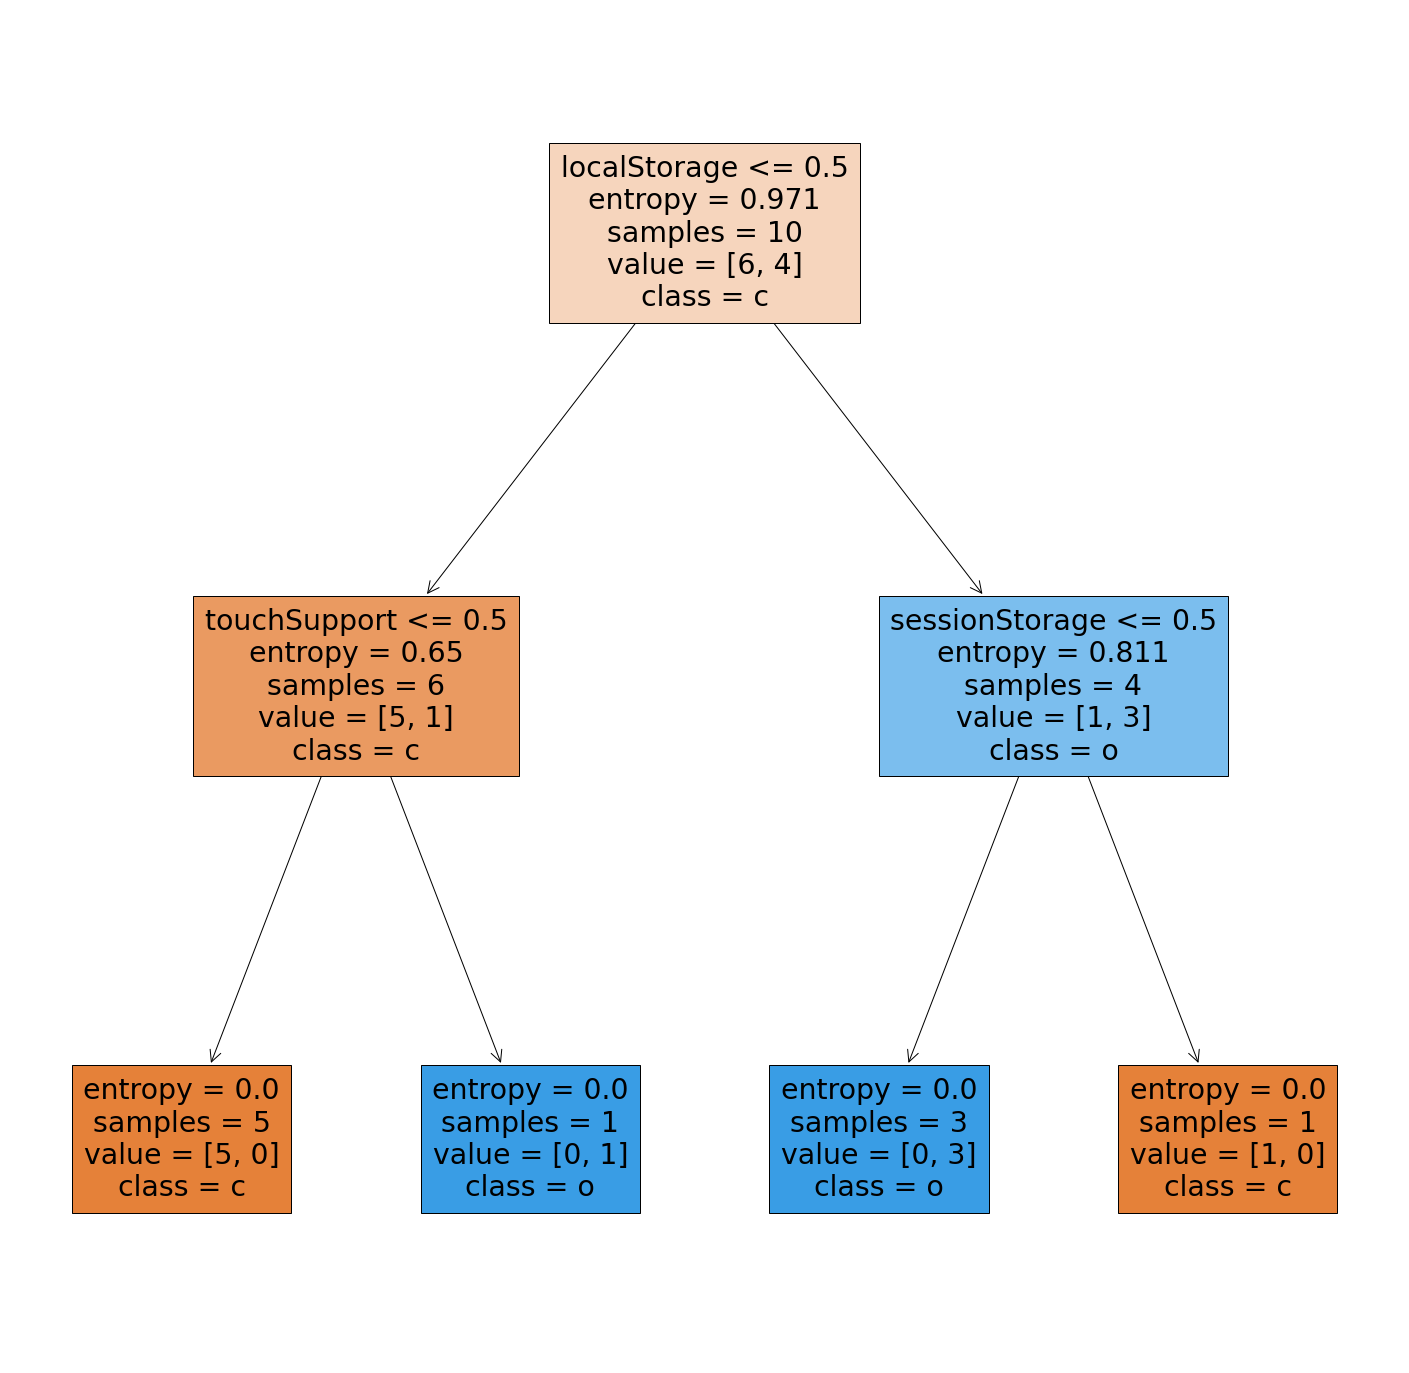

In [97]:
fig1 = plt.figure(figsize=(25,25))
_ = tree.plot_tree(clf, 
                   feature_names=X_train.columns,
                   class_names=df.columns[0], filled=True)




In [38]:
X_train

,deviceMemory,email,hardwareConcurrency,ip,languages,localStorage,nome,password,platform,sessionStorage,telefone,timezone,touchSupport,vendor,vendorFlavors
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0
2,2,2,1,2,0,0,2,2,0,1,2,0,1,0,0
3,1,3,0,3,0,0,3,3,0,1,3,0,0,0,0
4,0,4,0,4,0,1,4,4,0,0,4,0,1,0,0
5,0,5,0,4,0,1,5,5,0,1,5,0,1,0,0
6,1,6,1,5,0,0,6,6,0,0,6,0,0,0,0
7,2,7,1,6,0,0,7,7,0,0,7,0,0,0,0
8,1,8,1,7,0,1,8,8,0,0,8,0,0,0,0
9,3,9,0,7,0,0,9,9,0,1,9,0,0,0,0
